In [1]:
%pylab inline
import plot_is

Populating the interactive namespace from numpy and matplotlib


this is inside ramses6/ 

Now we have AMR we can use large grids 

In [7]:
rho_c = 1.1e-19
G = 6.67e-8
a  = 28730.5#in cm/s from sqrt(kT/m) where T = 10K
r_to_xi_factor = sqrt(4*pi*rho_c*G)/a
print r_to_xi_factor
t_to_tau_factor = sqrt(4*pi*G*rho_c)
print t_to_tau_factor
l_scale = 4.947e16 #code units --> cgs conversion 
t_scale = 1.95482e12

1.05686863016e-17
3.03643641787e-13


In FC, their boxsize is up to $\xi$ = 100

In [11]:
xi_box  = 100.
r_box = xi_box/r_to_xi_factor
print r_box,"cm"
#1 pcs = 3.08567758e18 cm
print "box should be ",r_box / 3.08567758e18 ,"pcs"
l_box = r_box /l_scale
print "box should be ", l_box,"code units"

9.4619139169e+18 cm
box should be  3.06639746752 pcs
box should be  191.265694702 code units


So we should see 1.53 pcs edges

right now the boxlen is 140

In [13]:
xi_cloud  = 6.41
r_cloud = xi_cloud/r_to_xi_factor
l_cloud = r_cloud /l_scale
print "cloud should be ",r_cloud / 3.08567758e18 ,"pcs"
print "cloud should be ", l_cloud,"code units"

cloud should be  0.196556077668 pcs
cloud should be  12.2601310304 code units


In [14]:
print "the box should be ~",l_box/(l_cloud*2),"times larger than the dense core"

the box should be ~ 7.80031201248 times larger than the dense core


Comparing full length to full lengths, since the cloud value is quoted as a radius we convert to diameter to compare to the full size of the box, so the full box should fit about 7 whole dense cores, which is what we previously had 

In [2]:
cd /project/projectdirs/astro250/doris/ramses6/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses6/trunk/ramses/bin


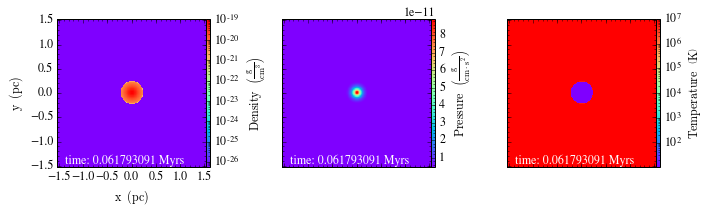

In [5]:
plot_is.check_IC_profiles()


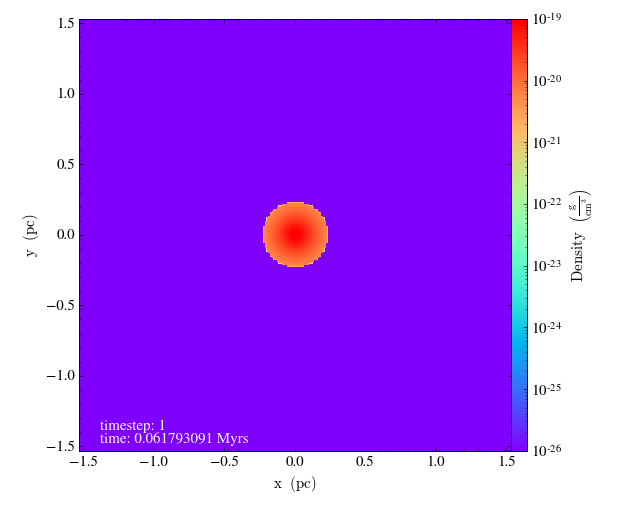

In [4]:
plot_is.plot_time_slice("density",1,plot_size=6,zmin=1e-26,zmax=1e-19)

Since this is not that different from our previous setup it is not important to re run this again, we could try even a larger box now that we have AMR to see if the radial velocities goes away 

also lower the lowest level of AMR 

let the box be 80 times the size of the cloud 

In [17]:
1000./12.2601310304

81.56519677647964


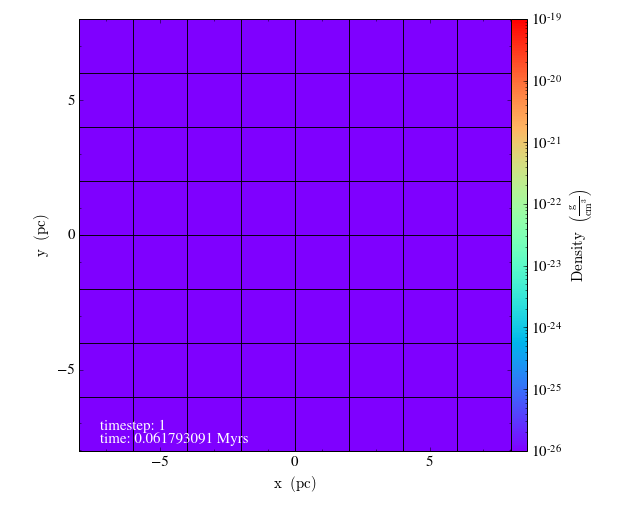

In [24]:
plot_is.plot_time_slice("density",1,grid=True,plot_size=6,zmin=1e-26,zmax=1e-19)


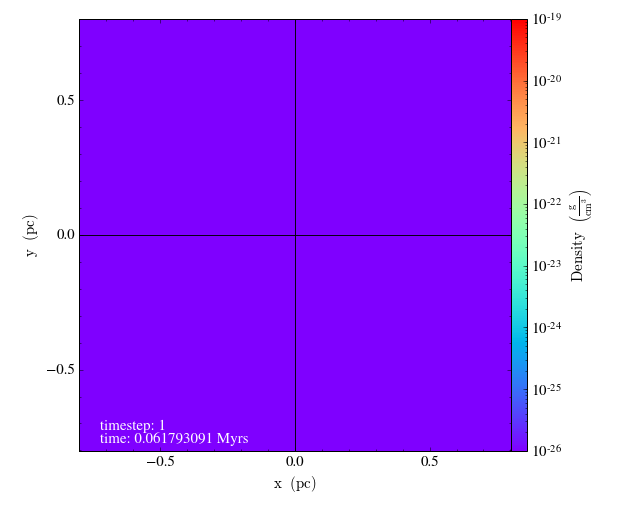

In [25]:
plot_is.plot_time_slice("density",1,grid=True,zoom_factor=10,plot_size=6,zmin=1e-26,zmax=1e-19)

Box too big the radius is always zero so no fill 


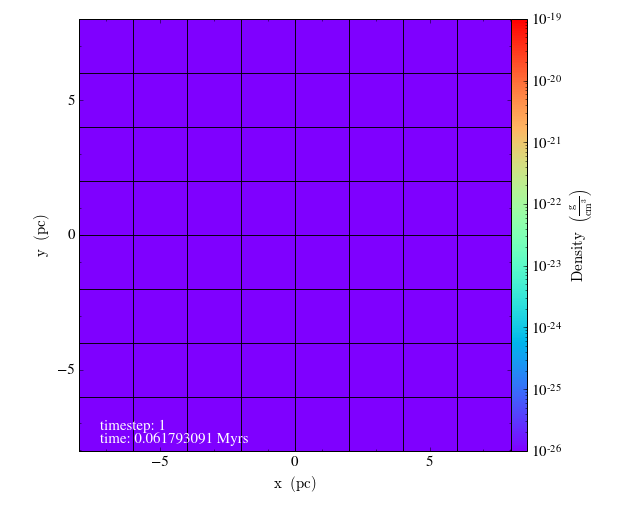

In [26]:
plot_is.plot_time_slice("density",1,grid=True,plot_size=6,zmin=1e-26,zmax=1e-19)


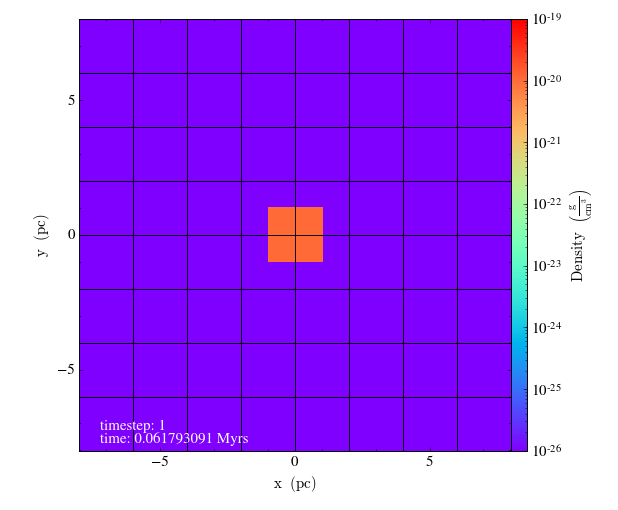

In [27]:
plot_is.plot_time_slice("density",1,grid=True,plot_size=6,zmin=1e-26,zmax=1e-19)

Becareful sometimes plot_is retains memory of the grid and doesn't refresh '


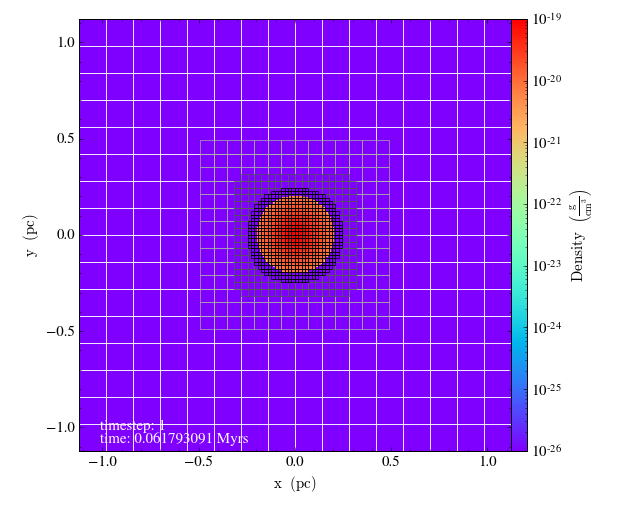

In [5]:
plot_is.plot_time_slice("density",1,grid=True,plot_size=6,zmin=1e-26,zmax=1e-19)

/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:701: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:711: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength



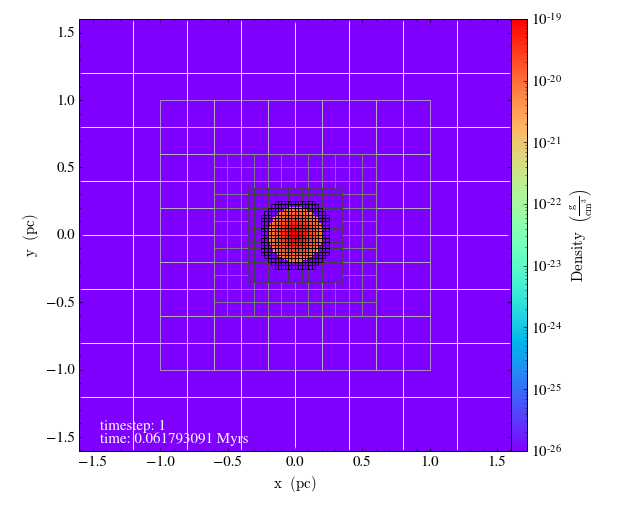

In [4]:
plot_is.plot_time_slice("density",1,grid=True,plot_size=6,zmin=1e-26,zmax=1e-19)


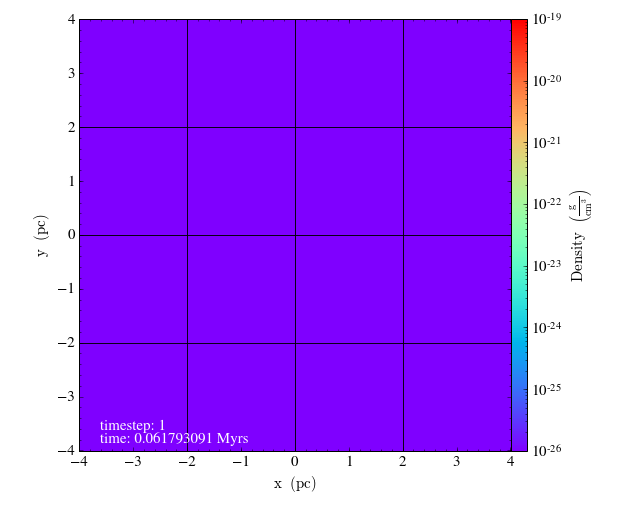

In [4]:
plot_is.plot_time_slice("density",1,grid=True,plot_size=6,zmin=1e-26,zmax=1e-19)


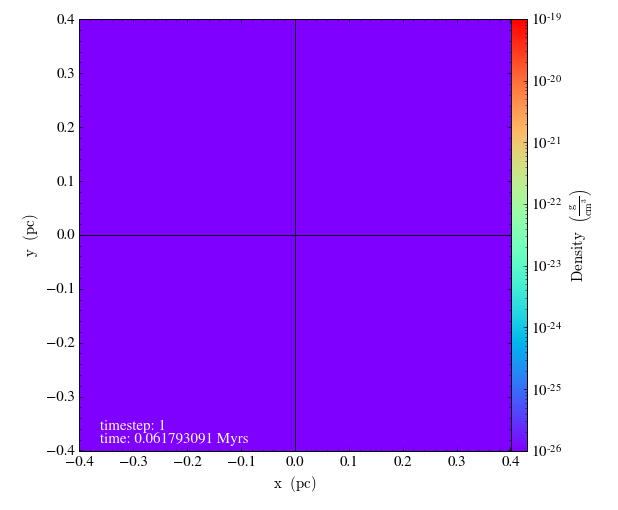

In [5]:
plot_is.plot_time_slice("density",1,zoom_factor = 10,grid=True,plot_size=6,zmin=1e-26,zmax=1e-19)

I think this is because AMR requires that the neighboring cells can only refine by a factor of two when we increase one level, but to get to the center we need a lot more refinement then the blocks we gave, so maybe explicit definiiton of SMR regions would be better here. 